# Tutorial on using Vowpal Wabbit and R Magic for the Oracle Data Challenge

## Step 1: Get Data

### A. Download full compressed data sets
links on slack general channel

### B. Download sampled data
links on slack general channel

### C. Create your own sample from downloaded full data sets
Download and install odc from https://github.com/CoDataScience/oracle-audience

also see Pedro's posts on slack competition channel


In [55]:
%%bash
#sample from full data sets
python3 /Users/jmf/workspace/Jupyter/odc/oracle-audience-master/odc.py sample 10000 data/train data/sampled_train.txt  #but this only sampled negative examples?

Single file detected


Traceback (most recent call last):
  File "/Users/jmf/workspace/Jupyter/odc/oracle-audience-master/odc.py", line 173, in <module>
    cli()
  File "/usr/local/lib/python3.5/site-packages/click-6.6-py3.5.egg/click/core.py", line 716, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.5/site-packages/click-6.6-py3.5.egg/click/core.py", line 696, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.5/site-packages/click-6.6-py3.5.egg/click/core.py", line 1060, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.5/site-packages/click-6.6-py3.5.egg/click/core.py", line 889, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.5/site-packages/click-6.6-py3.5.egg/click/core.py", line 534, in invoke
    return callback(*args, **kwargs)
  File "/Users/jmf/workspace/Jupyter/odc/oracle-audience-master/odc.py", line 128, in sample
    files = [smart_open.smart_open(inpu

## Step 2: [If you are running on the full data set] Decompress Data
see http://codata.colorado.edu/competitions/oracle/

In [ ]:
%%bash

#decompress and merge train data
tar -xzvf data/train_set.tar.gz
bzip2 -d data/train/*.bz2
cat data/train/* > data/train.txt


In [ ]:
%%bash

#decompress and merge validation data
tar -xzvf data/val_set.tar.gz
bzip2 -d data/val/*.bz2
cat data/val/* > data/val.txt


In [ ]:
%%bash

#decompress and merge contest data
tar -xzvf data/contest_set.tar.gz
bzip2 -d data/contest/*.bz2
cat data/contest/* > data/contest.txt

## Step 3: Install Vowpal Wabbit
see https://github.com/JohnLangford/vowpal_wabbit/wiki/Download

## Step 4: Convert training and validation data to Vowpal Wabbit format
code adapted from tutorial at http://codata.colorado.edu/notebooks/tutorials/odc_vowpalwabbit_nehal_kamat/

In [1]:
import itertools
DIR = "./data/"

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

In [103]:
# convert training data to VW format

vw_compatible_file = open(DIR+"./sampled_10000-train-vw_compatible_file.vw", 'wb')
with open(DIR + 'sampled_10000-train.txt', 'r') as train_data:
    nRows = file_len(DIR+'sampled_10000-train.txt')
    for line in itertools.islice(train_data, 0, nRows):
        el = eval(line)
        vw_compatible_file.write(str(el[1]) + " '" + str(el[0]) + " | ")
        for item in el[2][1]:
            vw_compatible_file.write(str(item[0]) + ":" + str(item[1]) + " ")
        vw_compatible_file.write("\n")
vw_compatible_file.close()

In [106]:
# convert validation data to VW format

vw_compatible_file = open(DIR+"./sampled_10000-val-vw_compatible_file.vw", 'wb')
with open(DIR + 'sampled_10000-val.txt', 'r') as val_data:
    nRows = file_len(DIR+'sampled_10000-val.txt')
    for line in itertools.islice(val_data, 0, nRows):
        el = eval(line)
        vw_compatible_file.write(str(el[1]) + " '" + str(el[0]) + " | ")
        for item in el[2][1]:
            vw_compatible_file.write(str(item[0]) + ":" + str(item[1]) + " ")
        vw_compatible_file.write("\n")
vw_compatible_file.close()

## Step 5: Train Vowpal Wabbit model(s)
see https://github.com/JohnLangford/vowpal_wabbit/wiki/Tutorial

Note: vw-varinfo is just a wrapper around vw that allows human-readable output of feature weights. see https://github.com/JohnLangford/vowpal_wabbit/wiki/using-vw-varinfo

### Default Model

In [284]:
%%bash

vw-varinfo -f data/model.vw -d data/sampled_10000-train-vw_compatible_file.vw > feature_weights.txt
#  -f says write the final model here
#  --loss_function logistic makes this binary classification
#  -d says use this training data 


### Lasso Regression

In [122]:
%%bash

vw-varinfo --l1 1e-7 -f data/model.vw -d data/sampled_10000-train-vw_compatible_file.vw > feature_weights.txt
# --l1 is lasso regression

### Neural network model

In [139]:
%%bash

vw-varinfo --nn 10 -f data/model.vw -d data/sampled_10000-train-vw_compatible_file.vw > feature_weights.txt
#  --nn is neural network model with X number of hidden units

## Step 6: Run Vowpal Wabbit model on Validation Set

In [285]:
%%bash

#example
vw -i data/model.vw -t data/sampled_10000-val-vw_compatible_file.vw -p predictions.txt
#  -t says, don`t learn, just score
#  -i says use this model to score
#  -p says output predictions to this file

only testing
predictions = predictions.txt
Num weight bits = 18
learning rate = 0.5
initial_t = 0
power_t = 0.5
using no cache
Reading datafile = data/sampled_10000-val-vw_compatible_file.vw
num sources = 1
average  since         example        example  current  current  current
loss     last          counter         weight    label  predict features
126.284500 126.284500            1            1.0   0.0000  11.2376      346
139.537628 152.790756            2            2.0   0.0000  12.3609      171
287.765436 435.993244            4            4.0  84.9700  57.2009     4396
322.304579 356.843722            8            8.0   0.0000   3.0295       69
241.897910 161.491241           16           16.0   0.0000  21.8121      841
391.066750 540.235590           32           32.0   0.0000   0.6538       49
346.160955 301.255160           64           64.0   0.0000   7.1842      111
1054.787658 1763.414360          128          128.0   0.0000   1.5063       57
1095.489470 1136.191283      

## Step 7: Convert VW predictions.txt file to submission format
see Pedro's posts on slack

In [10]:
#nBuyers = 100000
nBuyers = 1000

import sys
def parse_lines(file):
    lines = []
    with open(file) as f:
        for l in f:
            score, hhid = l.strip().split()
            score = float(score)
            hhid = int(hhid)
            lines.append((score, hhid))
    return lines

def write_submission(lines, output):
    sorted_predictions = sorted(lines, reverse=True)
    with open(output, 'w') as f:
        f.write('household_id,advertise\n')
        for i in range(len(sorted_predictions)):
            _, hhid = sorted_predictions[i]
            if i < nBuyers:
                f.write('{},1\n'.format(hhid))
            else:
                f.write('{},0\n'.format(hhid))
                
                
def write_submission_ordered(lines, output):
    sorted_predictions = sorted(lines, reverse=True)
    with open(output, 'w') as f:
        f.write('household_id\n')
        for i in range(len(sorted_predictions)):
            _, hhid = sorted_predictions[i]
            if i < nBuyers:
                f.write('{}\n'.format(hhid))
            else:
                f.write('{}\n'.format(hhid))

#if __name__ == '__main__':
#    lines = parse_lines(sys.argv[1])
#    write_submission(lines, sys.argv[2])

In [286]:
lines = parse_lines('predictions.txt')
write_submission(lines,'submission.csv')
write_submission_ordered(lines, 'submission_ordered.csv')

## Step 8: [If you are using sample validation data] Create sample_val_spend file for scoring

In [75]:
sample_val_spend_file = open(DIR+"./sample_val_spend.csv", 'wb')
with open(DIR + 'sampled_10000-val.txt', 'r') as sample_val_spend_data:
    nRows = file_len(DIR+'sampled_10000-val.txt')
    for line in itertools.islice(sample_val_spend_data, 0, nRows):
        el = eval(line)
        sample_val_spend_file.write(str(el[0]) + "," + str(el[1]))
        sample_val_spend_file.write("\n")
sample_val_spend_file.close()

## Step 9: Run scoring script on validation data
see https://github.com/CoDataScience/oracle-audience and Pedro's posts on slack

#### Ratio Scoring

In [287]:
%%bash

python3 /Users/jmf/workspace/Jupyter/odc/oracle-audience-master/odc.py score --ratio data/all_val_spend.csv submission.csv

#0.45 default VW settings
#0.45 L1 (lasso regression) at 1e-7
#0.40 L1 (lasso regression) at 1e-4
#0.27 L1 (lasso regression) at .01

#0.44 neural network w/ 5 hidden units
#0.44 neural network w/ 10 hidden units
#0.28 neural network w/ 100 hidden units

#0.05 logistic loss function (on unmodified data sets)

#.44 default VW with interaction terms of top 79 features



Scoring Options
ratio: True
ordered: False
spend_file: data/all_val_spend.csv
submission_file: submission.csv
Revenue: 68285.85000000003
Possible Revenue: 139006.7400000001
Fraction of Possible Revenue: 0.49124128801236533
Number of Responders: 410
Possible Number of Responders: 909
Fraction of Possible Responders 0.45104510451045104


#### Ordered Scoring [must use full data set to be accurate?]

In [111]:
%%bash 

python3 /Users/jmf/workspace/Jupyter/odc/oracle-audience-master/odc.py score --ordered --ratio data/all_val_spend.csv submission_ordered.csv



Scoring Options
ratio: True
ordered: True
spend_file: data/all_val_spend.csv
submission_file: submission_ordered.csv
Revenue: 72796.56000000003
Possible Revenue: 139006.7400000001
Fraction of Possible Revenue: 0.5236908656371624
Number of Responders: 432
Possible Number of Responders: 909
Fraction of Possible Responders 0.4752475247524752


## Step 10: Convert Contest Set data to Vowpal Wabbit format

In [ ]:
# convert validation data to VW format

vw_compatible_file = open(DIR+"./contest.vw", 'wb')
with open(DIR + 'contest.txt', 'r') as val_data:
    nRows = file_len(DIR+'contest.vw')
    for line in itertools.islice(val_data, 0, nRows):
        el = eval(line)
        vw_compatible_file.write(str(el[1]) + " '" + str(el[0]) + " | ")
        for item in el[2][1]:
            vw_compatible_file.write(str(item[0]) + ":" + str(item[1]) + " ")
        vw_compatible_file.write("\n")
vw_compatible_file.close()

## Step 10: Run Vowpal Wabbit model on Contest Set




In [ ]:
%%bash

#example
vw -i data/model.vw -t data/contest-vw_compatible_file.vw -p predictions_contest.txt
#  -t says, don`t learn, just score
#  -i says use this model to score
#  -p says output predictions to this file

## Step 11: Convert VW's contest set output to submission format


In [64]:
lines = parse_lines(DIR + 'predictions_contest.txt')
write_submission(lines, DIR +'submission_contest.csv')

IOError: [Errno 2] No such file or directory: './data/predictions_contest.txt'

# Model Introspection
see https://github.com/JohnLangford/vowpal_wabbit/wiki/using-vw-varinfo

### Install R Magic
http://rpy.sourceforge.net/rpy2/doc-dev/html/overview.html

In [3]:
%load_ext rpy2.ipython

In [4]:
%%R
f = read.table('feature_weights.txt', header=T)
print(dim(f))
print(head(f))
f$RelScore = as.numeric(sub("%","",f$RelScore))
summary(f)

[1] 130086      6
  FeatureName HashVal MinVal MaxVal  Weight RelScore
1       35875   35875      0      0 5996.03   17.65%
2       39858   39858      0      0 5177.77   15.24%
3        7208    7208      0      0 4508.64   13.27%
4      110472  110472      0      0 1889.09    5.56%
5       66485   66485      0      0 1889.09    5.56%
6       12654   12654      0      0 1750.51    5.15%
  FeatureName        HashVal           MinVal      MaxVal      Weight         
 0      :     1   Min.   :     0   Min.   :0   Min.   :0   Min.   :-33980.20  
 10     :     1   1st Qu.: 33359   1st Qu.:0   1st Qu.:0   1st Qu.:    -0.22  
 100    :     1   Median : 66742   Median :0   Median :0   Median :    -0.03  
 1000   :     1   Mean   : 66745   Mean   :0   Mean   :0   Mean   :    -0.19  
 10000  :     1   3rd Qu.:100107   3rd Qu.:0   3rd Qu.:0   3rd Qu.:     0.12  
 100000 :     1   Max.   :133530   Max.   :0   Max.   :0   Max.   :  5996.03  
 (Other):130080                                           

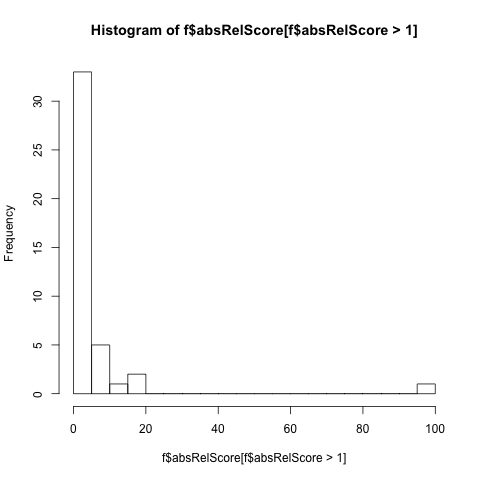

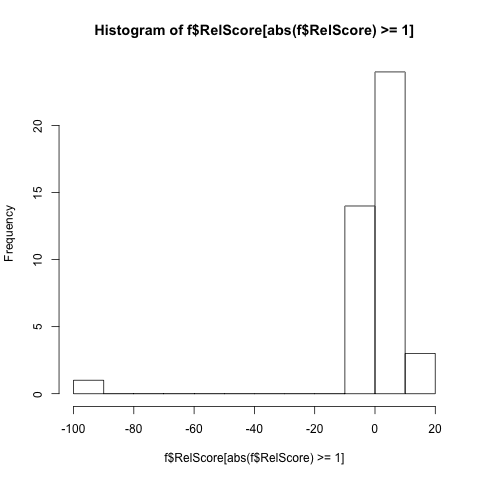

In [5]:
%%R
f$absRelScore = abs(f$RelScore)
hist(f$absRelScore[f$absRelScore>1], breaks=15)
hist(f$RelScore[abs(f$RelScore)>=1], breaks=15)

In [6]:
%%R
topFeatures = f[order(-f$absRelScore),]
print(nrow(topFeatures))
#topFeatures = topFeatures[order(-topFeatures$absRelScore),]
topFeatures[1:100,]

[1] 130086
       FeatureName HashVal MinVal MaxVal     Weight RelScore absRelScore
130086       78025   78025      0      0 -33980.200  -100.00      100.00
1            35875   35875      0      0   5996.030    17.65       17.65
2            39858   39858      0      0   5177.770    15.24       15.24
3             7208    7208      0      0   4508.640    13.27       13.27
130085       13930   13930      0      0  -3128.130    -9.21        9.21
4           110472  110472      0      0   1889.090     5.56        5.56
5            66485   66485      0      0   1889.090     5.56        5.56
6            12654   12654      0      0   1750.510     5.15        5.15
7            15330   15330      0      0   1716.390     5.05        5.05
8            53200   53200      0      0   1601.740     4.71        4.71
130084       35139   35139      0      0  -1504.100    -4.43        4.43
9            97998   97998      0      0   1474.850     4.34        4.34
130083      104584  104584      0      0

In [7]:
%Rpull topFeatureNames
#sends topFeatureNames variable and data from R to python
topFeatureNames

LookupError: 'topFeatureNames' not found